# Data Cleaning Demo: eBay Auto Data
---

## Purpose

In past works we focused on establishing our fundamental analytical skills. That being given a dataset we can use scientific tools and careful analysis to answer particular questions or draw general insights on the subject matter. These abilities are necessary of any good data scientist, but they are only part of the job. In fact, it is often overlooked that 90% of the work is spent preparing data rather than analyzing it. We have already showcased our analytical skills, so the purpose of this project will be to demonstrate our abilities in preparing and cleaning imperfect data. By doing so we will have proven our rank as a complete data scientist lacking in neither of the two disciplines required by the job.

---

## The Data

Our dataset for this project was scraped from eBay *Kleinanzeigen*, a classifieds section of the German eBay website, and contains information on auto sales. The original data was sourced from [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data), but for our purposes we will be using a modified version. This version was intentially manipulated to worsen the integrity of the data. As such, it requires significantly more care in preparation of analysis and should provide ample opportunities to demonstrate our data cleaning expertise. 

Before we begin cleansing, lets first read in our file and take a moment to visualize the overall structure of the dataset. Below is are some sample rows, statistics on each column, and some characteristics of the overall data structure.

In [1]:
# Using pandas package to read in the datafile 'auto.csv' and save in a dataframe structure.
import pandas as pd

autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

# Visualizing sample of data structure
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [2]:
# Printing additional information on the data strucure
autos.info()
autos.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-23 19:38:20,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


From the above information we see that our dataset is comprised of 50,000 rows and 20 columns. Currently, a quarter of these values are numerical and the rest are stored as strings. Moreover, at least one fifth of the rows in the dataset contains Null values. 

None of this information is too alarming; and looking at the samples, we see that our data is for the most part well formatted. However, it is clear that the Null values will need to be addressed and some of the columns stored as strings are meant to be numeric. Additionally, the columns names in camel case format, wherease the python convention is snake case, so these will also need to be changed. In the next section we will address these issues one by one as we clean our data. Furthermore, we will take a closer look certain rows and columns to remove irregularities and format their values properly for later analysis.

---

## Data Cleansing

Now that we have a basic feel for the data lets begin the cleansing process. Generally, when preparing a dataset there are several steps a good data scientist takes to ensure its vaidity. These include the following:

- Checking metadata, including: indices, column names, storage, etc.
- Formatting each data field
- Identifying duplicate rows
- Removing or modifying records with incorrect and incomplete data
- Adding, altering, and removing data fields as needed

We have already pointed out a few of these issues when taking a look at some samples of the data. In the remainder of this section we will address each of the these points in order.

### 1) Renaming Columns

As mentioned before, the columns are currently named using camel case (distinguished by a lack of spaces and presence of uppercase letters for each consecutive word). However, the convention in python, the language we are using, for naming variables and columns is instead snake case (distinguished by all lowercase characters and underscores seperating consecutive words). It is thought that this format makes the titles more readible for the audience and easier to type for the user. As such, we will follow the convention and rename the columns. As an example, the column name "nrOfPictures" will be converted to "nr_of_pictures". 

Instead of manually renaming each column, below we define a function that will reformat any given camel case string and then we loop over all the columns. 

In [3]:
# Defining function to rename columns.
def column_name_converter(name):
    '''
    This function takes as an input any string in camel case format  and returns the same
    string converted to snake case format.
    '''
    for letter in name:
        if 'A' <= letter <= 'Z':
            name = name.replace(letter,'_'+letter)
    return name.lower()

# Converting dataset column names to snake case format
new_columns = []
for name in autos.columns:
    new_columns.append(column_name_converter(name))
autos.columns = new_columns

# Sample of data structure with new column names
autos.head()

    

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


As we can see, the function succesfully converted each of the column names to our desired format. This has certainly made the names more readable, but there are still a few that we would like to change out of presonal preference: year_of_registration, month_of_registration, not_repaired_damage, and date_created. Below we manually replace each of these titles with our final prefered names.

In [4]:
# Renaming specific columns
autos.rename({'year_of_registration': 'registration_year', 'month_of_registration': 'registration_month', 
              'not_repaired_damage': 'unrepaired_damage', 'date_created': 'ad_created'},
            axis = 1, inplace = True)

# Sample of data with final column names
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### 2) Reformatting Fields

With the columns named what we want, it is now time to ensure their values are in the desired formats. We mentioned before that most of the dataset has been stored as strings, but some of these columns are intended to store numerical values. For instance, the first entry in the "price" column, "$5,000", is stored as text despite the fact that the value is numerical in nature. This is the case for both the "price" and "odometer" columns. Both are stored as text because of leading and trailing units, but they are clearly numerical data points. To fix this, we will remove the unwanted characters from the entries, convert them to numbers, and add the units to the column names.

In [5]:
# Removing '$'+',' from price and 'km'+',' from odometer fields, then reformatting both as integers
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(int)
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',','').astype(int)

# Renaming columns to include units
autos.rename({'price': 'price_$', 'odometer': 'odometer_km'}, axis = 1, inplace = True)

Moving on, notice that there are several columns pertaining to dates and times in our datesetthat were automatically stored as strings in the pandas dataframe. It would make more sense and be more useful to have them stored as actual datetimes, so let's convert them. Specifically, we will do the following: 

1. Convert 'date_crawled' and 'last_seen' to datetimes up to seconds
2. Convert 'ad_created' to datetimes up to days

In [6]:
# Convert date_crawled and last_seen to datetime objects with format: YYYY/mm/dd HH:MM:SS
autos['date_crawled'] = pd.to_datetime(autos['date_crawled'], format = '%Y/%m/%d %H:%M:%S')
autos['last_seen']    = pd.to_datetime(autos['last_seen']   , format = '%Y/%m/%d %H:%M:%S')

# Convert ad_created to datetime objects with format: YYYY/mm/dd
autos['ad_created'] = pd.to_datetime(autos['ad_created'], format = '%Y/%m/%d')

# Printing all the column types and data structure sample to confirm changes
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled          50000 non-null datetime64[ns]
name                  50000 non-null object
seller                50000 non-null object
offer_type            50000 non-null object
price_$               50000 non-null int32
abtest                50000 non-null object
vehicle_type          44905 non-null object
registration_year     50000 non-null int64
gearbox               47320 non-null object
power_p_s             50000 non-null int64
model                 47242 non-null object
odometer_km           50000 non-null int32
registration_month    50000 non-null int64
fuel_type             45518 non-null object
brand                 50000 non-null object
unrepaired_damage     40171 non-null object
ad_created            50000 non-null datetime64[ns]
nr_of_pictures        50000 non-null int64
postal_code           50000 non-null int64
last_seen             50000 non-null datetime6

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01 14:38:50


From the above outputs we can confirm that each of the mentioned columns have succesfully been converted to the datetime types and in the desired formats. 

You may notice that there are 2 additional columns pertaining to dates that we left out, 'registration_year' and 'registration_month'. Initially, we thought it might be best to combine these columns into a single field containing datetimes up to month. However, we noticed from earlier samples of the dataset that many of the values in the 'registration_month' column are 0. So to accomodate these values we would have needed to make the column contain some datetimes with only a year field and some with both a year and month. It is never good practice to have multiple data types or formats in the same field, so instead elected to keep the columns as is.

### 3) Identifying Duplicate Rows

For our next task we will check to see if any of the rows in our dataset contain the same information. The most straight forward way to do this, judging from the available columns, is to check if any two or more rows have the same post name. We can quickly accomplish this using pandas `Series.value_counts` on the 'name' column. This will create a freqeuncy list showing the occurences of each unique name.

In [7]:
# Crating freqeuncy table for the names
dups = autos['name'].value_counts()

# Print number of duplicate names and frequency table
print('# of non-duplicated records      : ', (dups == 1).sum())
print('# of distinct duplicated records : ', (dups > 1).sum())
print('# of distinct records total      : ', len(dups))

dups

# of non-duplicated records      :  35060
# of distinct duplicated records :  3694
# of distinct records total      :  38754


Ford_Fiesta                                                        78
Volkswagen_Golf_1.4                                                75
BMW_316i                                                           75
BMW_318i                                                           72
Volkswagen_Polo                                                    72
BMW_320i                                                           71
Opel_Corsa                                                         71
Renault_Twingo                                                     70
Volkswagen_Golf                                                    57
Opel_Corsa_1.2_16V                                                 56
BMW_116i                                                           53
Opel_Corsa_B                                                       52
Peugeot_206                                                        52
Ford_Focus                                                         50
Volkswagen_Polo_1.2 

Looking at the above frequency table, it is clear that many rows have the same name. However, notice that most of the names with duplicates are very short and simple, usually only containg the make and model of the car. It is likely that most of these are not actual duplicate posts, but coincidentally sales for the same type of car.

We should have expected this result because a few minutes looking on the on the eBay sight would have made clear this naming convention. As such, lets use other columns in addition to the name to help us identify each unique post. It should be highly unlikely that ads for the same type of car, in the same postal region, are created on the same date, so let's concatenate the 'postal_code' and 'ad_created' columns with the 'name' column in our new frequency table.

In [8]:
# Concatenating names and ad_created dates to create a more unique identifier
identifier = autos['name'] + autos['postal_code'].astype(str) + autos['ad_created'].astype(str)

# Creating frequency table for new identifier
dups = identifier.value_counts()

# Print number of duplicates and new frequency table
print('# of non-duplicated records      : ', (dups == 1).sum())
print('# of distinct duplicated records : ', (dups > 1).sum())
print('# of distinct records total      : ', len(dups))

dups

# of non-duplicated records      :  49866
# of distinct duplicated records :  67
# of distinct records total      :  49933


Ford_Focus_Coupe_Cabriolet_2.0_16V_Titanium657952016-04-01                          2
Audi_A4_Cabriolet_2.4441472016-04-04                                                2
Audi_A4_Avant_2.5_TDI_multitronic333342016-04-02                                    2
TOURAN_1.9TDI510652016-03-09                                                        2
Volkswagen_T5_Caravelle_Comfortline_Lang_DPF_gruene_Plakette776942016-03-19         2
Peugeot_206_AC_1_6l_16V_Panoramadach_+_Alu442692016-03-30                           2
Renault_Clio_1.2_16v511452016-03-16                                                 2
E_220_CDI_DPF_BlueEFFICIENCY_AMG_Sport_Packet_Navi101152016-03-22                   2
Opel_Astra_1.6_Caravan_Edition_100_Classic654282016-03-13                           2
Volvo_C30_2.0D261802016-03-17                                                       2
Opel_Agila_1.0_12_V551282016-03-19                                                  2
C_180_T_BlueEFFICIENCY_7G_TRONIC_Avantgarde101152016-0

With our new identifying columns the number of duplicates decreased dramatically, and no record occurs more than twice. Now let's look at a few examples of these duplicates to see if we can figure out the cause.

In [9]:
# Example 1
autos[autos['name'] + autos['postal_code'].astype(str) + autos['ad_created'].astype(str) == 
      'Golf_4_zu_verkaufen._4_tuerig613502016-03-16'].head()

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
3316,2016-03-16 17:54:30,Golf_4_zu_verkaufen._4_tuerig,privat,Angebot,1000,control,kleinwagen,1998,manuell,106,golf,150000,9,cng,volkswagen,NaN,2016-03-16,0,61350,2016-03-18 11:13:18
14638,2016-03-16 18:30:30,Golf_4_zu_verkaufen._4_tuerig,privat,Angebot,1200,control,kleinwagen,1998,manuell,106,golf,150000,9,cng,volkswagen,NaN,2016-03-16,0,61350,2016-03-17 19:36:48


In [10]:
# Example 2
autos[autos['name'] + autos['postal_code'].astype(str) + autos['ad_created'].astype(str) == 
      'Audi_A4_Avant_2.5_TDI_multitronic333342016-04-02'].head()

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
21439,2016-04-02 18:46:15,Audi_A4_Avant_2.5_TDI_multitronic,privat,Angebot,3250,control,kombi,2004,automatik,163,a4,150000,9,diesel,audi,nein,2016-04-02,0,33334,2016-04-04 16:46:26
38796,2016-04-02 17:55:51,Audi_A4_Avant_2.5_TDI_multitronic,privat,Angebot,3250,control,kombi,2004,automatik,163,a4,150000,9,diesel,audi,nein,2016-04-02,0,33334,2016-04-04 15:47:47


In [11]:
# Example 3
autos[autos['name'] + autos['postal_code'].astype(str) + autos['ad_created'].astype(str) == 
      'Honda_Civic_1.8i_VTEC956152016-03-10'].head()

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
9017,2016-03-10 12:54:55,Honda_Civic_1.8i_VTEC,privat,Angebot,7600,test,limousine,2008,manuell,140,civic,90000,7,benzin,honda,nein,2016-03-10,0,95615,2016-03-12 02:44:38
49090,2016-03-10 11:50:11,Honda_Civic_1.8i_VTEC,privat,Angebot,7600,test,limousine,2008,manuell,140,civic,90000,7,benzin,honda,nein,2016-03-10,0,95615,2016-03-10 11:50:11


In each of the 3 examples only 2 column entries differ between each of the duplicate records. These are the 'date_crawled' and 'last_seen' columns. According to the [source](https://www.kaggle.com/orgesleka/used-cars-database/data), these fields indicate the time the web scraper first and last saw the auto ad on eBay. It also says that the values in all other columns were populated when the scraper first saw the ad. Based on this, I would guess the web scraper mistakenly identified the same auto ad twice for each of these cases. This may be due to changes to each ad while the web scraper was running, as seen in Example 1 where the price changed between each read. Regardless of the cause, it makes most sense to keep the version of the record with the more recent 'date_crawled' value, since this record will have more recent data.

Below we remove the record for each set of duplicates that has the later 'date_crawled' value and recreate our frequncy table to confirm.

In [12]:
# Looping over each set of duplicates and grabbing the row number of the record to be removed
removal_indices = []
for identifier in dups[dups > 1].keys():
    dup_set = autos[autos['name'] + autos['postal_code'].astype(str) + autos['ad_created'].astype(str) == identifier]
    max_date_crawled = dup_set['date_crawled'].max()
    removal_index = dup_set[dup_set['date_crawled'] != max_date_crawled].index[0]
    removal_indices.append(removal_index)

# Dropping records from data structure according to row index
autos.drop(removal_indices, inplace = True)

# Recreating frequency table to confirm removal of duplicates
identifier = autos['name'] + autos['postal_code'].astype(str) + autos['ad_created'].astype(str)
dups = identifier.value_counts()
print('# of non-duplicated records      : ', (dups == 1).sum())
print('# of distinct duplicated records : ', (dups > 1).sum())
print('# of distinct records total      : ', len(dups))
dups

# of non-duplicated records      :  49933
# of distinct duplicated records :  0
# of distinct records total      :  49933


Nissan_Micra_1.2_visia837342016-03-29                                               1
Spritziges_Anfaengerauto_Ford_fiesta_style885252016-03-26                           1
VW_Passat_*_Vollleder*268712016-03-29                                               1
Leasinguebernahme_Seat_Leon_ST_FR_2.0_TDI__Start&Stop853992016-03-18                1
Audi_A4_Cabriolet_2.5_TDI274042016-03-29                                            1
Peugeot_206_Guten_zustand261602016-03-11                                            1
Volkswagen_Golf_1.4_TSI_Highline338182016-03-19                                     1
BMW_530D_Top_Zustand523512016-03-27                                                 1
Robur_Bus/Van_20_Sitze_.122772016-03-24                                             1
Mazda_2_1.4l_Exclusive563322016-03-28                                               1
BMW_X5_30d_Vollaustatung_Motorschaden456612016-03-31                                1
Mercedes_Benz__A_180356062016-03-03                   

### 4) Removing Or Modifying Records With Incorrect and Incomplete Data

This is the most difficult part of cleaning data because it essentially boils down to one's ability to find abnormalities in the dataset. Some errors are easily identifiable, such as a single incorrect value recurring through most entries in a column. But many errors are almost impossible to catch. For example, a single mispelled name. There is no set methodology for finding these errors other than time, effort, and sometimes a bit of luck.

Since this project is for demonstrative purposes only, we will not spend too much effort fixing each minute detail and focus on larger issues. As was done earlier, the best first approach for noticing problems with our data is to use pandas `DataFrame.describe()` function which prints some statistics on each column. This will mainly show us the most frequent values and overall range for each column to see if anything stands out.

In [13]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,49933,49933,49933,49933,4.993300e+04,49933,44846,49933.000000,47260,49933.000000,47179,49933.000000,49933.000000,45456,49933,40120,49933,49933.0,49933.000000,49933
unique,48151,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39430
top,2016-03-10 15:36:24,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49932,49932,NaN,25724,12841,NaN,36948,NaN,4020,NaN,NaN,30081,10677,35182,1945,NaN,NaN,8
first,2016-03-05 14:06:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-11 00:00:00,NaN,NaN,2016-03-05 14:45:46
last,2016-04-07 14:36:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,NaN,2016-04-07 14:58:50
mean,NaN,NaN,NaN,NaN,9.844083e+03,NaN,NaN,2005.071135,NaN,116.373581,NaN,125738.189173,5.723730,NaN,NaN,NaN,NaN,0.0,50818.770072,NaN
std,NaN,NaN,NaN,NaN,4.814270e+05,NaN,NaN,105.783432,NaN,209.342791,NaN,40041.770114,3.712371,NaN,NaN,NaN,NaN,0.0,25779.875921,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN


Right off the batt there are 4 issues clearly identifiable from this information:

1. Each row has the same value in each of the 3 columns 'seller', 'offer_type', and 'nr_of_pictures'
2. The max values for the 'price_\\$' and 'power_p_s' columns are unreasonably high
3. The min value for the 'registration_month' column is 0 which is nonsensical
4. The entire range of values for 'registration_year' is not realistic

We will address 1. in the next section, so let's focus our attention on 2. to 4.. We now know that there are some incorrect values in each of the four columns 'price_$', 'power_p_s', 'registration_month', and 'registration_year'. Our next question should be, what are the incorrect values and to what extent do they persist in our data. Typically, to address this issue we will need to take a closer look at each column. The quickest way to do this is to build a frequency table for each which can be easily done using pandas `Series.value_counts` function. Below we will do just that one by one for each column and do more investigating as needed to solve the issue.

In [14]:
# Frequency of prices in descending order
print('Highest Auto Prices ($)')
autos['price_$'].value_counts().sort_index(ascending = False)

Highest Auto Prices ($)


99999999       1
27322222       1
12345678       3
11111111       2
10000000       1
3890000        1
1300000        1
1234566        1
999999         2
999990         1
350000         1
345000         1
299000         1
295000         1
265000         1
259000         1
250000         1
220000         1
198000         1
197000         1
194000         1
190000         1
180000         1
175000         1
169999         1
169000         1
163991         1
163500         1
155000         1
151990         1
            ... 
66             1
65             5
60             9
59             1
55             2
50            49
49             4
47             1
45             4
40             6
35             1
30             7
29             1
25             5
20             4
18             1
17             3
15             2
14             1
13             2
12             3
11             2
10             7
9              1
8              1
5              2
3              1
2             

Above we see there are a handful of ads for autos with outrageous prices. There appears to be a stark jump in prices after \\$350,000. I would gamble that all the records with higher prices are flukes given that the base price for a Ferrari is \\&dollar;250K and most expensive cars aren't sold on eBay. Just to be sure, lets print out a few of these records below.

In [15]:
# Printing all records with price > $150,000
autos[autos['price_$'] > 150000].sort_values('price_$', ascending = False)

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,privat,Angebot,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22,0,73525,2016-04-06 05:15:30
42221,2016-03-08 20:39:05,Leasinguebernahme,privat,Angebot,27322222,control,limousine,2014,manuell,163,c4,40000,2,diesel,citroen,NaN,2016-03-08,0,76532,2016-03-08 20:39:05
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,privat,Angebot,12345678,control,limousine,2001,manuell,101,vectra,150000,3,benzin,opel,nein,2016-03-31,0,4356,2016-03-31 18:56:54
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,privat,Angebot,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08,0,14542,2016-04-06 23:17:31
27371,2016-03-09 15:45:47,Fiat_Punto,privat,Angebot,12345678,control,NaN,2017,NaN,95,punto,150000,0,NaN,fiat,NaN,2016-03-09,0,96110,2016-03-09 15:45:47
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,privat,Angebot,11111111,test,limousine,1973,manuell,48,escort,50000,3,benzin,ford,nein,2016-03-12,0,94469,2016-03-12 22:45:27
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,privat,Angebot,11111111,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-21,0,18519,2016-03-21 14:40:18
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,privat,Angebot,10000000,control,coupe,1960,manuell,368,NaN,100000,1,benzin,sonstige_autos,nein,2016-03-29,0,73033,2016-04-06 21:18:11
47634,2016-04-04 21:25:21,Ferrari_FXX,privat,Angebot,3890000,test,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,nein,2016-04-04,0,60313,2016-04-05 12:07:37
7814,2016-04-04 11:53:31,Ferrari_F40,privat,Angebot,1300000,control,coupe,1992,NaN,0,NaN,50000,12,NaN,sonstige_autos,nein,2016-04-04,0,60598,2016-04-05 11:34:11


Looking at the records above it becomes more clear most of the prices above \\$350,000 are mistakes or placeholders. The only two that prices that seem reasonable, and according to a translated are actual car names, are the Ferrari_FXX at \\$3,890,000 and the Ferrari_F40 at \\$1,300,000. However, we double checked the prices for these models online and they are well above a reasonable asking price. As such, we will go ahead and remove these outliers from our dataset since they are few and far between. Afterwords, we shift our attention to the 'power_p_s' column, starting by printing its frequency table.

In [16]:
# Dropping all records with price_$ > $350,000
autos.drop(autos[autos['price_$'] > 350000].index, inplace = True)

In [17]:
print('Highest Auto Power Measures (PS)')
autos['power_p_s'].value_counts().sort_index(ascending = False)

Highest Auto Power Measures (PS)


17700       1
16312       1
16011       1
15016       1
15001       1
14009       1
9011        1
8404        1
7511        1
6512        1
6226        1
6045        1
5867        1
4400        1
3750        1
3500        1
2729        1
2018        1
1998        2
1988        1
1986        1
1800        3
1796        1
1793        1
1781        1
1780        1
1779        1
1771        1
1753        1
1704        1
         ... 
35          2
34         27
33          9
32          2
30          3
29          5
27          5
26         39
25          2
24          1
23          4
21          1
20          4
19          3
18          6
16          1
15          5
14          1
12          1
11          4
10          3
9           1
8           2
6           3
5          13
4           4
3           3
2           2
1           5
0        5487
Name: power_p_s, Length: 447, dtype: int64

From the above frequency table there is no upper range of power values that stand out quite like for price column. The values are fairly evenly spread out though they increase somewhat rapidly above 2000 PS. Though it is not clear in our data, a few minutes researching online tells us that the typical horspower for an automobile is in the 100's PS range. For example, below are average horsepowers for different car types:

- Sedan: 150 PS
- SUV: 200PS
- Pickup Truck: 300PS
- Semi-Truck: 500PS
- Bugatti Chiron (Highest HP Car In Production): 1479PS

Given the above values, I think it is safe to remove any rows with more than 1500 PS, but lets print some of these records just to double check.

In [18]:
# Printing all records with power_p_s > 500
autos[autos['power_p_s'] > 500].sort_values('power_p_s', ascending = False)

,date_crawled,name,seller,offer_type,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
36421,2016-03-20 16:51:48,Verkaufe_meinen_bmw_525d,privat,Angebot,6000,test,kombi,2004,automatik,17700,5er,150000,7,diesel,bmw,nein,2016-03-20,0,26316,2016-04-06 22:45:56
35039,2016-03-10 08:57:25,Top_Cabrio_A4_s_line,privat,Angebot,11950,test,cabrio,2008,manuell,16312,a4,20000,4,benzin,audi,nein,2016-03-10,0,51647,2016-03-17 09:16:19
46986,2016-03-22 22:55:30,Skoda_Octavia_Combi_Tsi,privat,Angebot,5000,control,NaN,2018,manuell,16011,octavia,150000,2,benzin,skoda,ja,2016-03-22,0,12681,2016-03-23 07:41:08
45671,2016-03-18 00:51:03,PT_Cruiser_Crd_2.0_fuer_Kurzentschlossene_bis_...,privat,Angebot,0,test,NaN,2016,manuell,15016,ptcruiser,150000,12,diesel,chrysler,NaN,2016-03-17,0,24802,2016-03-20 09:51:49
22592,2016-04-04 14:59:24,Top_geopflegter_fiesta_st,privat,Angebot,5200,test,kleinwagen,2005,manuell,15001,fiesta,150000,12,benzin,ford,nein,2016-04-04,0,70372,2016-04-06 16:17:54
16743,2016-03-17 23:53:06,Opel_Astra_j,privat,Angebot,9799,control,limousine,2011,manuell,14009,NaN,80000,6,benzin,opel,nein,2016-03-17,0,86415,2016-03-23 17:18:38
23742,2016-04-01 18:48:19,Gilf_3_rolling_stone_tuev_bis_11/17,privat,Angebot,1250,control,NaN,2017,manuell,9011,golf,60000,5,NaN,volkswagen,nein,2016-04-01,0,34121,2016-04-01 18:48:19
41172,2016-04-03 14:45:36,Suzuki_Baleno_1_3l_GS_TÜV_neu,privat,Angebot,950,test,kleinwagen,2001,manuell,8404,andere,125000,7,benzin,suzuki,NaN,2016-04-03,0,1594,2016-04-05 13:45:11
24943,2016-03-30 09:53:11,Renault_Kangoo_1_2,privat,Angebot,1150,control,bus,2001,manuell,7511,kangoo,150000,11,benzin,renault,nein,2016-03-30,0,53757,2016-04-07 00:17:44
1699,2016-04-04 19:49:19,Opel_Corsa_1.0_Motor_ecotek,privat,Angebot,1200,test,limousine,2001,manuell,6512,corsa,150000,12,benzin,opel,NaN,2016-04-04,0,47198,2016-04-06 22:16:46


Nothing from the above records indicates the high horsepowers are legitimate. In fact, we went ahead and checked some of the models present in the names which all had much lower horsepowers than shown here. One can only assume this is due to some eror with the web scraper, so we will go ahead and remove all rows with 'power_p_s' > 1500 PS (). After doing so we will move on to our next column of interest 'registration_month' and print it's frequency tables.

In [19]:
# Dropping all records with power_p_s 1500
autos.drop(autos[autos['power_p_s'] > 1500].index, inplace = True)

In [20]:
print('Auto Registration Months')
autos['registration_month'].value_counts().sort_index()

Auto Registration Months


0     5065
1     3271
2     3000
3     5062
4     4095
5     4100
6     4354
7     3939
8     3188
9     3373
10    3647
11    3358
12    3434
Name: registration_month, dtype: int64

Above we see that roughly 10\% of our records contain a 0 for the registration month. This value does not make sense, but we do not want to remove such a large number of rows. Instead, the 0 most likely means the registration month was not available or unknown, so we will instead replace the 0 value with the more appropriate NaN or Null value. After doing so, we will move on to our final column 'registration_year'.

In [21]:
import numpy as np

# Replacing all occurences of 0 in registration_month with null value
autos.loc[autos['registration_month'] == 0, 'registration_month'] = np.nan

In [22]:
print('Auto Registration Years')
autos['registration_year'].value_counts().sort_index(ascending = False)

Auto Registration Years


9999       4
9996       1
9000       2
8888       1
6200       1
5911       1
5000       4
4800       1
4500       1
4100       1
2800       1
2019       3
2018     487
2017    1445
2016    1312
2015     399
2014     663
2013     805
2012    1321
2011    1626
2010    1593
2009    2095
2008    2223
2007    2298
2006    2707
2005    3009
2004    2730
2003    2721
2002    2527
2001    2693
        ... 
1964      12
1963       9
1962       4
1961       6
1960      33
1959       7
1958       4
1957       2
1956       5
1955       2
1954       2
1953       1
1952       1
1951       2
1950       3
1948       1
1943       1
1941       2
1939       1
1938       1
1937       4
1934       2
1931       1
1929       1
1927       1
1910       9
1500       1
1111       1
1001       1
1000       1
Name: registration_year, Length: 96, dtype: int64

From the above table we can clearly see two ranges in our registration years that are most likely typos or a mistake generated by the web scraper, years < 1910 and years > 2019. These records will be removed below.

Additionally, we should note that all this data was scraped in 2016 according to the 'date_crawled' column. If this were true then we could not have any cars registered in the years 2017-2019 which are present in the data. There is probably some other issue with these records as well, but for the time being we will ignore it, but keep this point in mind during our analysis.

In [23]:
# Dropping all records with registration_year < 1910
autos.drop(autos[autos['registration_year'] < 1910].index, inplace = True)

# Dropping all records with registration_year > 2019
autos.drop(autos[autos['registration_year'] > 2019].index, inplace = True)

We have now addressed all the obvious issues with our dataset by either removing or replacing the faulty data. More than likely there are still other errors in the data. Typically we would try to identify more using the same methodology on each of the columns: visualize the more common values in a frequency table, look over the records, using common sense and research to deduce which values are appropriate, use pandas methods to replace or remove the incorrect datapoints. Since we have demonstrated this process more than adequately, we will move on to our final step in cleaning our data.

### 5) Removing Unecessary Columns

As mentioned earlier, there are several fields in our dataset that are not of much use. Specifically, the 'seller', 'offer_type', and 'nr_of_pictures' columns only contain a single value, so there is nothing more to learn from these fields by keeping them in our data structure. Below we remove these columns.

In [24]:
# Dropping seller, offer_type, and nr_of_pictures columns from dataset
autos.drop(['seller', 'offer_type', 'nr_of_pictures'], axis = 1, inplace = True)

We have now completed the process of cleansing our dataset. Over the course of this section we completed each of the following steps to improve the integrity of our data:

    1) Renamed columns
    2) Formatted each data field
    3) Identifying duplicate rows
    4) Removed or modified records with incorrect and incomplete data
    5) Removed irrelevant data fields

Our dataset should now be ready for analysis, but before we move on it would be wise to save the cleaned data to a new file. This will ensure that we don't have to repeat our work if we wish to use the data in the future and will save our colleagues some trouble if they intend to use it as well.

---

## Sample Analysis

Though the primary goal of this project was to showcase our data cleaning abilities, we will now perform some sample analysis in order to demonstrate the benefits of a trustworthy dataset. Suppose we are in the business of buying and reselling cars for profit. To do so we have to purchase cars sold at a discount and resell them to buyers willing to pay more. Therefore, it is necessary that we be able to both accurately value cars and recognize ones that have a potential resale market. 

We are new to the business, so we wish to get started by sticking with a few car brands that are more fruitful than others. A good first step we might take is to identify the more popular brands and estimate the typical price points for each. Below we build aggregate our data by brand, counting the number of cars advertised in each and calculating the average selling price.

In [25]:
# Grabbing count of ads for each brand
brand_data = autos[['brand','name']].groupby('brand').count()
#Renaming column to frequency
brand_data.rename({'name': 'frequency'}, axis = 1, inplace = True)
# Also calculating it as a %
brand_data['frequency_%'] = brand_data['frequency'] / brand_data['frequency'].sum() * 100
# Ranking each frequency for clarity
brand_data['frequency_rank'] = brand_data['frequency'].rank(method = 'dense', ascending = False).astype(int)

# Calculating average and median price for each brand
brand_data['avg_price'] = autos[['brand','price_$']].groupby('brand').mean()
brand_data['median_price'] = autos[['brand','price_$']].groupby('brand').median()
# Ranking the brands by average price
brand_data['price_rank'] = brand_data['avg_price'].rank(method = 'dense', ascending = False).astype(int)

# Sorting and printing the results
brand_data.sort_values('frequency_rank', inplace = True)
brand_data

,frequency,frequency_%,frequency_rank,avg_price,median_price,price_rank
brand,,,,,,
volkswagen,10662,21.382159,1,5157.554962,2800.0,15
opel,5445,10.919702,2,2843.650689,1500.0,33
bmw,5416,10.861543,3,8020.539882,5500.0,9
mercedes_benz,4724,9.473769,4,8383.140982,4950.0,8
audi,4270,8.563292,5,8966.521077,5865.0,7
ford,3468,6.954917,6,3628.282007,1700.0,26
renault,2400,4.813092,7,2352.304167,1300.0,36
peugeot,1453,2.913926,8,3013.334480,2000.0,32
fiat,1307,2.621129,9,2697.677123,1550.0,34


Above we see that Volkswagen is by far the most popular brand accounting for over one fifth of the ads, twice as frequent as any other brand. Though Volkswagen dominates, there are a few other brands that each account for more than 5% of the ads on the website, including: Opel, BMW, Mercedes Benz, Audi, and Ford. Together these 6 brands account for over 2/3 the ads. For the rest of the analysis we will focus only on these brands whose popularity offers less risk to a new car dealer.

In [45]:
# Restricting our brands to the 6 of interest
brand_data = brand_data.iloc[0:6]

# Creating new column for above categorizations of each brand
brand_data['category'] = pd.Series({'bmw': 'High-End', 'mercedes_benz': 'High-End','audi': 'High-End'
                                   ,'volkswagen': 'Medium'
                                   ,'opel': 'Low-End','ford': 'Low-End'})
brand_data

,frequency,frequency_%,frequency_rank,avg_price,median_price,price_rank,category,max_buy_price,min_sell_price
brand,,,,,,,,,
volkswagen,10662,21.382159,1,5157.554962,2800.0,15,Medium,1999.0,3350.0
opel,5445,10.919702,2,2843.650689,1500.0,33,Low-End,1150.0,1800.0
bmw,5416,10.861543,3,8020.539882,5500.0,9,High-End,3700.0,6500.0
mercedes_benz,4724,9.473769,4,8383.140982,4950.0,8,High-End,3500.0,5800.0
audi,4270,8.563292,5,8966.521077,5865.0,7,High-End,3899.0,6990.0
ford,3468,6.954917,6,3628.282007,1700.0,26,Low-End,1200.0,2000.0


Now that we know the brands we like, we need to figure out how to value them. Based on there average prices we can segment our 6 brands into 3 categories of price: 

1) *High-End*: BMW, Mercedes Benz, Audi
2) *Medium*: Volkswagen
3) *Low-End*: Opel, Ford

The total frequency for each category is somewhere between 18-29%, so each should make up roughly a third of the cars we deal. For each category we will want to buy low and sell high. To minimize risk, lets say want to set up rules for when buying and selling. One such rule that comes to mind is setting up percentile ranges within which our buying and selling activities are restricted. For example, we could set the rule that we only buy cars in the lowest 40th percentile of prices and sell them in the highest 55th percentile of prices, since doing so will guarantee a profit. As such, below we will calculate these quartiles for each brand in our 3 categories.

In [46]:
#Calculating 33rd percentile for each category
lower_quantiles, upper_quantiles = {}, {}
for brand in brand_data.index:
    lower = autos[autos['brand'] == brand]['price_$'].quantile(.40)
    upper = autos[autos['brand'] == brand]['price_$'].quantile(.55)
    lower_quantiles[brand] = lower
    upper_quantiles[brand] = upper

# Adding new columns for quantiles to brand_data structure
brand_data['max_buy_price'] = pd.Series(lower_quantiles)
brand_data['min_sell_price'] = pd.Series(upper_quantiles)

# Print edited data
brand_data

,frequency,frequency_%,frequency_rank,avg_price,median_price,price_rank,category,max_buy_price,min_sell_price
brand,,,,,,,,,
volkswagen,10662,21.382159,1,5157.554962,2800.0,15,Medium,1999.0,3350.0
opel,5445,10.919702,2,2843.650689,1500.0,33,Low-End,1150.0,1800.0
bmw,5416,10.861543,3,8020.539882,5500.0,9,High-End,3700.0,6500.0
mercedes_benz,4724,9.473769,4,8383.140982,4950.0,8,High-End,3500.0,5800.0
audi,4270,8.563292,5,8966.521077,5865.0,7,High-End,3899.0,6990.0
ford,3468,6.954917,6,3628.282007,1700.0,26,Low-End,1200.0,2000.0


It is worth noting that the above ranges are quite large, despite the small separation in our percentiles. This shows the difficulty in trading these cars. Upon further consideration or after no luck, it may be necessary to adjust the percentiles in our rule to apply to our trading skills. 

Now that we know the prices to shoot for, we need some auto attributes to help us find the right deals. One of the main determining factors in the resale of a car is it's mileage. We know that as the mileage on a car goes up, the price tends to go down, so we might be able to resell a car for more if it has a low mileage. As such, lets find the average mileage for each of our three categories of cars, so we know which cars could hold more value. Just for fun, we will visualize these averages in a bar graph with the standard deviations as the errors.

In [28]:
import matplotlib.pyplot as plt

# Gathering price points for each category
high_mileage = autos[(autos['brand'] == 'bmw') | (autos['brand'] == 'mercedes_benz') | (autos['brand'] == 'audi')]['odometer_km']
medium_mileage = autos[autos['brand'] == 'volkswagen']['odometer_km']
low_mileage = autos[(autos['brand'] == 'opel') | (autos['brand'] == 'ford')]['odometer_km']

# Calculating means and standard deviations
high_average, high_std = high_mileage.mean(), high_mileage.std()
medium_average, medium_std = high_mileage.mean(), high_mileage.std()
low_average, low_std = high_mileage.mean(), high_mileage.std()

# Creating scatter plot with linear regression for each category
labels = ['High-End', 'Medium', 'Low-End']
averages = [high_average, medium_average, low_average]
stds = [high_std, medium_std, low_std]
plt.figure(1)
plt.bar(labels, averages)
plt.errorbar(labels, averages, stds, linestyle = '', marker = 'o', color = 'r', capsize = 12)
plt.xlabel('Category'), plt.ylabel('Average Mileage (km)')
plt.show()

<Figure size 640x480 with 1 Axes>

Based on the above bar graph, it appears that all auto categories have nearly the same average mileage and spread. These values seem conspicuously close though, and the averages are higher than expected, so lets dig a little deeper. To see what might be going on let's view a frequency table for one of the category mileages.

In [29]:
# Creating frequency table for all ads in the high-end category of brands
high_mileage.value_counts().sort_index()

5000        209
10000        63
20000       200
30000       174
40000       183
50000       218
60000       246
70000       271
80000       317
90000       389
100000      497
125000     1160
150000    10483
Name: odometer_km, dtype: int64

Above we see that there are only a handful of unique mileage values and all are multiples of 5,000 and 10,000. Most likely the website has the seller pick from a range of these values when creating the ad and is not the accurate mileage. To better visulaize these ranges, lets create a cumulative distribution graph for the mileages under each of the categories.

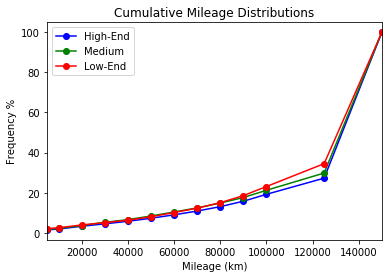

In [35]:
# Calculating cumulative ranges as %'s
high_distr = high_mileage.value_counts().sort_index().cumsum() / len(high_mileage) * 100
medium_distr = medium_mileage.value_counts().sort_index().cumsum() / len(medium_mileage) * 100
low_distr = low_mileage.value_counts().sort_index().cumsum() / len(low_mileage) * 100

# Creating plots for each
plt.figure(1)
high_distr.plot(color = 'b', marker = 'o', label = 'High-End')
medium_distr.plot(color = 'g', marker = 'o', label = 'Medium')
low_distr.plot(color = 'r', marker = 'o', label = 'Low-End')
plt.legend()
plt.title('Cumulative Mileage Distributions')
plt.xlabel('Mileage (km)'), plt.ylabel('Frequency %')
plt.show()

From the above graph we see that most of the cars in our designated brands have mileages at or above 150,000km. It's hard to say whether this is actually the case or if most sellers pick this value as a placeholder. If the former is true, then any cars under 100,000km are ideally what we would be looking for as a trader, making up the lower quartile. We would likely be able to sell these cars for a premium, given we do not over pay for them initially, because of there lower than average mileage. However, if it is determined that these mileages are not accurate, then further research is required.

Through careful analysis we have been able to determine a set of rules that should optimize our auto trading activities on eBay *Kleinanzeigen*. If our reasoning was valid then we should be able to make a fair profit. To get us started, and as a last example for our analysis, below are a sample of ads that look like promising opportunities for our any one in our audience that might follow our guidelines.

In [42]:
# Building boolean cases to filter data to potential opportunites following our rules
check_1 = autos['brand'] == 'volkswagen'
check_2 = autos['price_$'] < 1999.0
check_3 = autos['odometer_km'] < 100000

# View potential cars to buy then resell for profit
autos[check_1 & check_2 & check_3].sort_values(['registration_year', 'price_$'], ascending = [0,1])

,date_crawled,name,price_$,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
28120,2016-03-07 12:58:03,Auto_zu_vermieten_Kurz_Langzeit_30_400_,30,test,NaN,2018,manuell,0,touran,20000,NaN,cng,volkswagen,NaN,2016-03-07,99089,2016-03-08 03:17:05
6927,2016-03-31 12:55:34,Polo_86c_Steilheck._TÜV_Neu_!_Top_!,950,test,NaN,2018,manuell,45,polo,90000,11.0,benzin,volkswagen,NaN,2016-03-31,21698,2016-04-02 07:47:53
6376,2016-03-07 12:54:17,Volkswagen_Golf_3,1350,test,NaN,2018,manuell,60,golf,80000,11.0,benzin,volkswagen,NaN,2016-03-07,87439,2016-03-21 05:47:48
1889,2016-03-11 14:36:58,Golf_2_90PS,1950,control,NaN,2018,automatik,90,golf,70000,10.0,benzin,volkswagen,nein,2016-03-11,89155,2016-03-24 19:45:50
18162,2016-03-11 20:57:08,VW_polo_mit_tuev_angebot,350,control,NaN,2017,manuell,60,polo,60000,7.0,NaN,volkswagen,ja,2016-03-11,66687,2016-03-13 02:45:27
19155,2016-03-15 16:39:38,VW_Golf_3_Variant_Kombi_03/2017_Tuev_Diesel,555,control,NaN,2017,NaN,0,golf,30000,9.0,diesel,volkswagen,NaN,2016-03-15,87700,2016-03-16 13:45:39
30570,2016-03-21 19:44:15,Golf_3,750,test,NaN,2017,manuell,60,golf,90000,NaN,benzin,volkswagen,ja,2016-03-21,23558,2016-04-02 21:19:16
197,2016-04-05 10:36:24,VW_Polo_9N_an_Bastler,888,control,NaN,2017,manuell,64,polo,20000,7.0,NaN,volkswagen,ja,2016-04-05,58566,2016-04-07 13:16:13
43726,2016-03-20 11:57:29,VW_Polo_6n_1.4_Open_Air,1300,test,NaN,2017,manuell,60,polo,90000,11.0,NaN,volkswagen,nein,2016-03-20,64385,2016-03-24 02:45:44
24959,2016-03-31 12:40:51,Vw_Polo_2002_Klima,1490,test,NaN,2017,NaN,0,polo,20000,2.0,benzin,volkswagen,NaN,2016-03-31,36251,2016-03-31 12:40:51


## Final Remarks

The primary mission of this project was to demonstrate our ability to clean a messy dataset and prepare it for in-depth analysis. To showcase our skills we took the following steps to improve the integrity of our data:

    1) Renamed columns
    2) Formatted each data field
    3) Identifying duplicate rows
    4) Removed or modified records with incorrect and incomplete data
    5) Removed irrelevant data fields

Afterwords, we walked through some sample analysis to show how an seamless the process can when we trust the quality of our data. Through our analysis we were able to make key insights that might assist an inexperienced trader trying to buy and sell cars through eBay *Kleinanzeigen*. Our methodologies and results in each of these respects should prove to anyone our capacity as a well-rounded data scientist. 